<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/9week/RNN_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/9주차/data/TSLA.csv')
close = df['Close'].values.reshape(-1,1)

In [69]:
split = int(len(close)*0.8)
scaler = MinMaxScaler()
scaler.fit(close[:split])
close_scaled = scaler.transform(close)

In [70]:
X = df.drop("Volume", axis=1)
y = df["Volume"]

X

,Date,Open,High,Low,Close,Adj Close
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000
...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985


In [71]:
window = 10
X, y = [], []
for i in range(len(close_scaled)-window):
    X.append(close_scaled[i:i+window])
    y.append(close_scaled[i+window])
X, y = np.array(X), np.array(y)

In [72]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
model2.compile(optimizer='adam', loss='mse')

In [75]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0204
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1564e-04
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6952e-04
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3442e-04
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3404e-04
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9700e-04
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4653e-04
Epoch 9/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0819e-04
Epoch 10/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5124e-04
Epoch 11/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.7122e-04
Epoch 12/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8071e-04
Epoch 13/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4379e-04
Epoch 14/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0677e-04
Epoch 15/30
74/74 ━━━━━━━━━━━━━━━━━━━

In [76]:
model2.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0682
Epoch 2/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 3/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0013
Epoch 4/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011
Epoch 5/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0012
Epoch 6/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012
Epoch 7/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 8/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 9/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 10/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 11/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7164e-04
Epoch 12/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4699e-04
Epoch 13/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.6438e-04
Epoch 14/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.8917e-04
Epoch 15/30
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - l

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


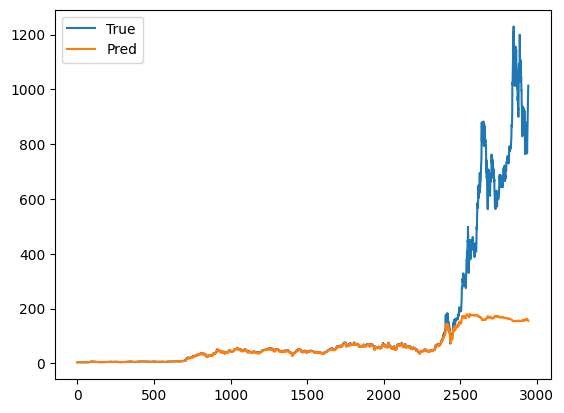

RNN MSE: 45.719268798828125


In [77]:
pred = model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

mse = model.evaluate(X_test, y_test, verbose=0)
print('RNN MSE:', mse)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


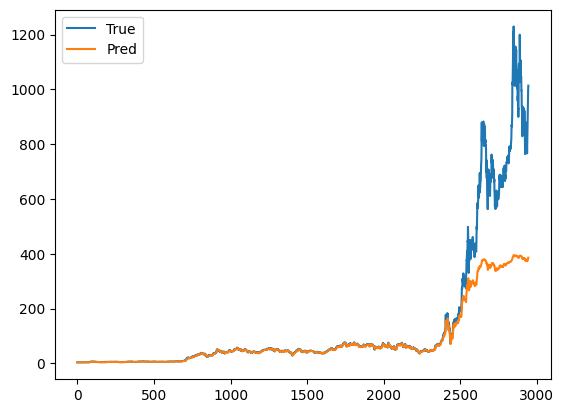

RNN2 MSE: 21.484119415283203


In [78]:
pred = model2.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

mse2 = model2.evaluate(X_test, y_test, verbose=0)
print('RNN2 MSE:', mse2)